**Action Recognition: Recognize human actions or activities in videos. This task requires understanding both spatial and temporal information in video data.** <br>
La reconnaissance d'actions est un problème de vision par ordinateur et d'apprentissage automatique qui vise à identifier et classer les actions ou activités effectuées par des personnes dans des vidéos. Voici un aperçu de la façon d'aborder le problème de la reconnaissance d'actions :

    Comprendre le problème : La reconnaissance d'actions nécessite de comprendre et d'analyser des informations spatiales (apparence des objets et des personnes) et temporelles (évolution des objets et des personnes dans le temps) contenues dans les vidéos.

    Collecte des données : Rassemblez des vidéos contenant des personnes effectuant différentes actions. Vous pouvez utiliser des ensembles de données existants tels que UCF101, HMDB51 et Kinetics. Ces ensembles de données contiennent généralement des annotations fournissant les classes d'actions pour chaque vidéo.

    Prétraitement des données : Préparez les données en les normalisant, en les redimensionnant et en les échantillonnant temporellement si nécessaire. L'augmentation des données peut inclure des techniques telles que les retournements, les changements d'éclairage et les modifications de la vitesse de lecture pour améliorer la généralisation du modèle.

    Choix du modèle : Sélectionnez un modèle approprié pour la reconnaissance d'actions. Les modèles populaires pour la reconnaissance d'actions incluent les réseaux de neurones convolutifs 3D (3D CNN), les réseaux neuronaux bidirectionnels (Bi-LSTM), les réseaux de neurones convolutifs à déplacement temporel (TSN) et les réseaux Inflated 3D ConvNets (I3D).

    Entraînement du modèle : Entraînez le modèle sélectionné sur l'ensemble de données d'entraînement. Pour les modèles d'apprentissage en profondeur, vous devrez peut-être expérimenter différents hyperparamètres tels que le taux d'apprentissage, la taille du lot et le nombre d'époques d'entraînement.

    Évaluation du modèle : Évaluez les performances de votre modèle sur un ensemble de données de test distinct. Utilisez des mesures pertinentes telles que la précision, le rappel, le score F1 et la matrice de confusion pour mesurer la qualité de votre modèle.

    Amélioration et itération : En fonction des performances de votre modèle, vous devrez peut-être ajuster l'architecture du modèle, les techniques de prétraitement ou les paramètres d'entraînement. N'hésitez pas à expérimenter et à apprendre des erreurs pour améliorer continuellement votre modèle.
<br>
1. Comprendre le problème : La reconnaissance d'actions nécessite de comprendre et d'analyser des informations spatiales (apparence des objets et des personnes) et temporelles (évolution des objets et des personnes dans le temps) contenues dans les vidéos.
**Overview**

UCF101 is an action recognition data set of realistic action videos, collected from YouTube, having 101 action categories. This data set is an extension of UCF50 data set which has 50 action categories.

With 13320 videos (27 hours) from 101 action categories, UCF101 gives the largest diversity in terms of actions and with the presence of large variations in camera motion, object appearance and pose, object scale, viewpoint, cluttered background, illumination conditions, etc, it is the most challenging data set to date. As most of the available action recognition data sets are not realistic and are staged by actors, UCF101 aims to encourage further research into action recognition by learning and exploring new realistic action categories.
https://www.crcv.ucf.edu/research/data-sets/ucf101/<br> <br>
**Data Set Details**

The videos in 101 action categories are grouped into 25 groups, where each group can consist of 4-7 videos of an action. The videos from the same group may share some common features, such as similar background, similar viewpoint, etc.

The action categories can be divided into five types:

    Human-Object Interaction
    Body-Motion Only
    Human-Human Interaction
    Playing Musical Instruments
    Sports

The action categories for UCF101 data set are: Apply Eye Makeup, Apply Lipstick, Archery, Baby Crawling, Balance Beam, Band Marching, Baseball Pitch, Basketball Shooting, Basketball Dunk, Bench Press, Biking, Billiards Shot, Blow Dry Hair, Blowing Candles, Body Weight Squats, Bowling, Boxing Punching Bag, Boxing Speed Bag, Breaststroke, Brushing Teeth, Clean and Jerk, Cliff Diving, Cricket Bowling, Cricket Shot, Cutting In Kitchen, Diving, Drumming, Fencing, Field Hockey Penalty, Floor Gymnastics, Frisbee Catch, Front Crawl, Golf Swing, Haircut, Hammer Throw, Hammering, Handstand Pushups, Handstand Walking, Head Massage, High Jump, Horse Race, Horse Riding, Hula Hoop, Ice Dancing, Javelin Throw, Juggling Balls, Jump Rope, Jumping Jack, Kayaking, Knitting, Long Jump, Lunges, Military Parade, Mixing Batter, Mopping Floor, Nun chucks, Parallel Bars, Pizza Tossing, Playing Guitar, Playing Piano, Playing Tabla, Playing Violin, Playing Cello, Playing Daf, Playing Dhol, Playing Flute, Playing Sitar, Pole Vault, Pommel Horse, Pull Ups, Punch, Push Ups, Rafting, Rock Climbing Indoor, Rope Climbing, Rowing, Salsa Spins, Shaving Beard, Shotput, Skate Boarding, Skiing, Skijet, Sky Diving, Soccer Juggling, Soccer Penalty, Still Rings, Sumo Wrestling, Surfing, Swing, Table Tennis Shot, Tai Chi, Tennis Swing, Throw Discus, Trampoline Jumping, Typing, Uneven Bars, Volleyball Spiking, Walking with a dog, Wall Pushups, Writing On Board, Yo Yo.

In [ ]:
# check if PyAV is installed
try:
    import av
except ImportError:
    !pip install av
    import av

#manually restart runtime
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 41.1 MB/s eta 0:00:0000:0100:01


2. Collecte des données : utilisation de HCF101 qui est annoté

In [ ]:
import os # operating system

#path where data is stored
data_path = '/kaggle/input/ucf101/UCF101/UCF-101'
#path where annotations are stored
annotation_path = '/kaggle/input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist'

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = "tight"


def plot(imgs, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            img = F.to_pil_image(img.to("cpu")) if torch.is_tensor(img) else img # Convert tensors to PIL images : https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.functional.to_pil_image
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    plt.tight_layout()

torch.Size([164, 3, 240, 320]) (number of frames, height, width, channels)
torch.Size([2, 289152])
{'video_fps': 25.0, 'audio_fps': 44100}
clip duration:  6.56 s


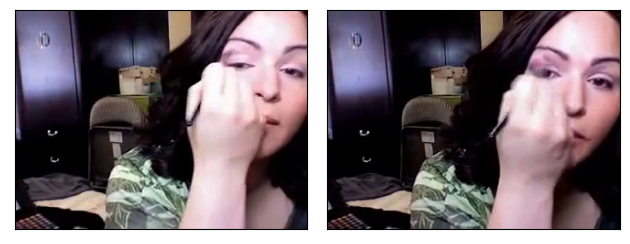

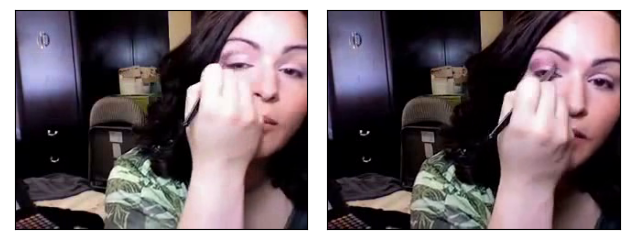

In [3]:
import torchvision
video_path = data_path+"/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi"
# Constructor allocates memory and a threaded decoder
# instance per video. At the moment it takes two arguments:
# path to the video file, and a wanted stream.
frames, audio, metadata = torchvision.io.read_video(video_path, pts_unit='sec', output_format="TCHW")
print(frames.shape, '(number of frames, height, width, channels)') # (number of frames, height, width, channels)
print(audio.shape)
print(metadata)
print('clip duration: ', frames.shape[0] / metadata['video_fps'], 's')

img1_batch = torch.stack([frames[100], frames[150]])
img2_batch = torch.stack([frames[101], frames[151]])

plot(img1_batch)
plot(img2_batch)

3. Prétraitement des données : Préparez les données en les normalisant, en les redimensionnant et en les échantillonnant temporellement si nécessaire. L'augmentation des données peut inclure des techniques telles que les retournements, les changements d'éclairage et les modifications de la vitesse de lecture pour améliorer la généralisation du modèle.

In [1]:
!pip install torch --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 887.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 58.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 55.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0


cuda


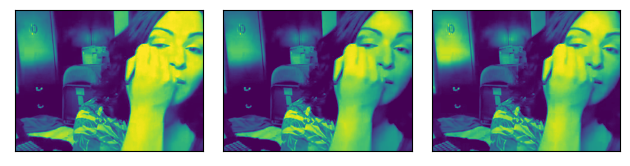

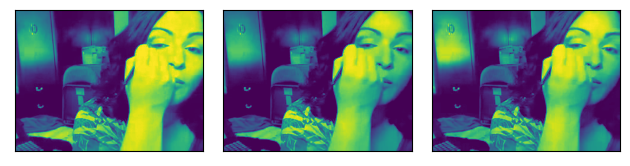

In [8]:
# Transformations and augmentations for video data with torchvision.transforms.v2
# https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.v2.Compose
# lets try only one transformation for now
# toTensor() converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]

from torchvision.transforms import Compose, ToPILImage, ToTensor

transform = Compose([
    ToPILImage(),
    ToTensor()
])

device = 'cuda' if torch.cuda.is_available() else 'cpu'
img1_batch_tr = transform(img1_batch[0].to(device))
img2_batch_tr = transform(img2_batch[0].to(device))

plot(img1_batch_tr)
plot(img2_batch_tr)

torch.Size([3, 150, 150]) (batch size, channels, height, width)


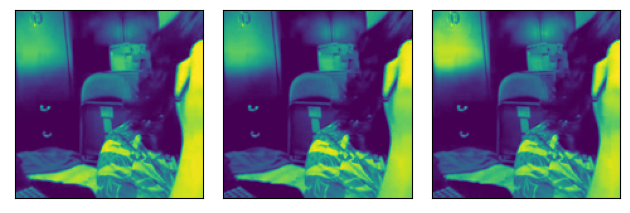

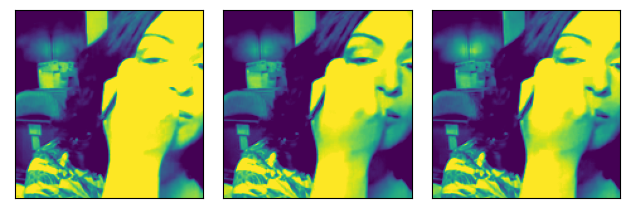

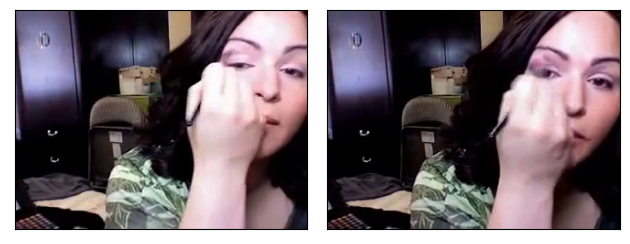

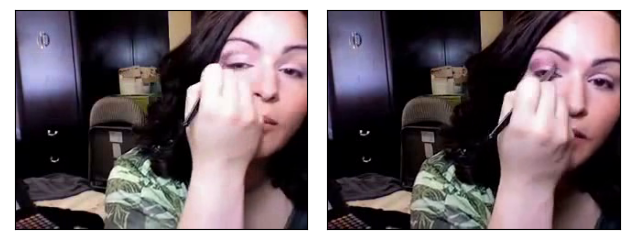

In [11]:
# lets try normalization and color jitter
from torchvision.transforms import Normalize, ColorJitter, RandomCrop, Resize

class ToFloatTensor: # convert to float tensor
    def __call__(self, img): # img is a tensor
        return img.float() # convert to float tensor
    
colorjittering = 0.2
resizedim = 170
transform = Compose([
    ToPILImage(),
    Resize(resizedim), # resize for a square image (240 x 240)
    ColorJitter(brightness=colorjittering, contrast=colorjittering, saturation=colorjittering), # color jittering
    ToTensor(), # convert to image tensor (C x H x W) in the range [0.0, 1.0]
    RandomCrop(resizedim - 20), # random crop
])

device = 'cuda' if torch.cuda.is_available() else 'cpu'

img1_batch_tr = transform(img1_batch[0].to(device))
img2_batch_tr = transform(img2_batch[0].to(device))

print(img1_batch_tr.shape, "(batch size, channels, height, width)")

plot(img1_batch_tr)
plot(img2_batch_tr)
plot(img1_batch)
plot(img2_batch)

In [23]:
class VideoTransform:
    def __init__(self, transform):
        self.transform = transform

    def __call__(self, clip):
        transformed_clip = []
        for frame in clip:
            transformed_frame = self.transform(frame)
            transformed_clip.append(transformed_frame)
        return torch.stack(transformed_clip)

In [26]:
# find the mean and std of the three channels of the dataset once it has been cropped to 240 x 240 and normalized to 0-1
# https://discuss.pytorch.org/t/computing-the-mean-and-std-of-dataset/34949/2
# https://discuss.pytorch.org/t/how-to-normalize-images-in-dataloader/25563/2

# path where data is stored = data_path
# path where annotations are stored = annotation_path
annotation_path = '/kaggle/input/ucf101/UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist'

resizedim = 180
colorjittering = 0.1

transform_train = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize(resizedim),
    torchvision.transforms.ColorJitter(brightness=colorjittering, contrast=colorjittering, saturation=colorjittering),
    torchvision.transforms.ToTensor(),
])

transform_val = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize(resizedim),
    torchvision.transforms.ToTensor(),
])

video_transform_train = VideoTransform(transform_train)
video_transform_val = VideoTransform(transform_val)

#torch initialization of UCF101 dataset
frames_per_clip = 8 # number of frames in each video clip to reduce memory usage
step_between_clips = 1 # number of frames between each video clip to reduce memory usage
ucf101_val = torchvision.datasets.UCF101(data_path, annotation_path=annotation_path, frames_per_clip=frames_per_clip, step_between_clips=step_between_clips, train=False, transform=transform_val, num_workers=2)
ucf101_train = torchvision.datasets.UCF101(data_path, annotation_path=annotation_path, frames_per_clip=frames_per_clip, step_between_clips=step_between_clips, train=True, transform=transform_train, num_workers=2)

# frames_per_clip is the number of frames in each extracted video clip. In this case, it is set to 16, meaning that each video clip will have 16 consecutive frames. 
# This is a common setting for video classification tasks, as it allows the model to capture enough temporal information to understand the action being performed while keeping the input size manageable.

# step_between_clips is the number of frames between the starting points of two consecutive extracted video clips from the same video. 
# In this case, it is set to 1, meaning that the clips will be extracted with a stride of 1 frame. 
# This will result in a high degree of overlap between the clips and can help cover the entire video with a comprehensive set of short clips. 
# However, it can also lead to more data and increased computational requirements. 
# A larger stride would result in less overlap and fewer extracted clips, which could potentially reduce the amount of training data and computational requirements.

#check the length of the dataset
print(len(ucf101_train), len(ucf101_val))

  0%|          | 0/833 [00:00<?, ?it/s]

  0%|          | 0/833 [00:00<?, ?it/s]

1719320 670735


In [ ]:
# if needed, define a subset of the dataset
div = 100 # divide the dataset by this number
ucf101_train = torch.utils.data.Subset(ucf101_train, range(len(ucf101_train)//div))
ucf101_val = torch.utils.data.Subset(ucf101_val, range(len(ucf101_val)//div))

#check the length of the dataset
print(len(ucf101_train), len(ucf101_val))

**Ici, je remarque que le fold de default est 1, il faudra pour ameliorer les performances train sur les 3.**

3. Choix du modèle : Sélectionnez un modèle approprié pour la reconnaissance d'actions. Les modèles populaires pour la reconnaissance d'actions incluent les réseaux de neurones convolutifs 3D (3D CNN), les réseaux neuronaux bidirectionnels (Bi-LSTM), les réseaux de neurones convolutifs à déplacement temporel (TSN) et les réseaux Inflated 3D ConvNets (I3D).

In [27]:
# import des outils utiles
! wget https://github.com/rdfia/rdfia.github.io/raw/master/code/2-cd/utils.py
from utils import *

--2023-04-02 15:41:36--  https://github.com/rdfia/rdfia.github.io/raw/master/code/2-cd/utils.py
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/code/2-cd/utils.py [following]
--2023-04-02 15:41:36--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/code/2-cd/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2627 (2.6K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]   2.57K  --.-KB/s    in 0s      

2023-04-02 15:41:37 (37.2 MB/s) - ‘utils.py.1’ saved [2627/2627]



In [28]:
class Metric: 
    def __init__(self):
        self.loss_train = []
        self.loss_test = []
        self.acc_train = []
        self.acc_test = []

In [29]:
import torch.utils.data

def get_dataset(train_dataset, val_dataset, batch_size, cuda=False):
    """
    Cette fonction charge le dataset et effectue des transformations sur chaqu
    image (listées dans `transform=...`).
    """

    train_loader = torch.utils.data.DataLoader(train_dataset,
                        batch_size=batch_size, shuffle=True, pin_memory=cuda, num_workers=2)
    val_loader = torch.utils.data.DataLoader(val_dataset,
                        batch_size=batch_size, shuffle=False, pin_memory=cuda, num_workers=2)

    return train_loader, val_loader

In [30]:
import time
from utils import AverageMeter

def epoch(data, model, criterion, optimizer=None, cuda=False):
    """
    Make a pass (called epoch in English) on the data `data` with the
     model `model`. Evaluates `criterion` as loss.
     If `optimizer` is given, perform a training epoch using
     the given optimizer, otherwise, perform an evaluation epoch (no backward)
     of the model.
    """

    # indicates whether the model is in eval or train mode (some layers behave differently in train and eval)
    model.eval() if optimizer is None else model.train()

    # objects to store metric averages
    avg_loss = AverageMeter()
    avg_top1_acc = AverageMeter()
    avg_top5_acc = AverageMeter()
    avg_batch_time = AverageMeter()

    # we iterate on the batches
    tic = time.time()
    for i, (input, target) in enumerate(data):

        if cuda: # only with GPU, and not with CPU
            input = input.cuda()
            target = target.cuda()

        # forward
        output = model(input)
        loss = criterion(output, target)

        # backward if we are training
        if optimizer:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # compute metrics
        prec1, prec5 = accuracy(output, target, topk=(1, 5))
        batch_time = time.time() - tic
        tic = time.time()

        # update
        avg_loss.update(loss.item())
        avg_top1_acc.update(prec1.item())
        avg_top5_acc.update(prec5.item())
        avg_batch_time.update(batch_time)
        if optimizer:
            loss_plot.update(avg_loss.val)

    return avg_top1_acc, avg_top5_acc, avg_loss

In [31]:
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.backends.cudnn as cudnn
import torch.nn as nn

def main(train_dataset, val_dataset, batch_size=128, lr=0.2, epochs=35, cuda=False, patience=5):
    best_dropout_rate = None
    best_validation_accuracy = 0.0
    best_metrics = None
    criterion = nn.CrossEntropyLoss()
    
    global loss_plot
    loss_plot = TrainLossPlot()

    # define model, loss, optim
    model = CustomNet()
    optimizer = torch.optim.Adam(model.parameters(), lr)

    scheduler = CosineAnnealingLR(optimizer, T_max=7, eta_min=1/(10**patience))

    if cuda:
        # Set the cudnn.benchmark flag to True for cudnn to use the built-in autotuner to find the best algorithm for the hardware
        cudnn.benchmark = True

        # Set the pin_memory flag to True for DataLoader to use pinned (page-locked) memory, which speeds up data transfer between CPU and GPU
        pin_memory = True

        model = model.cuda()
        criterion = criterion.cuda()

    # Get the data
    train, test = get_dataset(train_dataset, val_dataset, batch_size, cuda)

    # Initialize a list to store metrics
    listm = []

    best_val_loss = float('inf')
    epochs_without_improvement = 0

    for i in range(epochs):
        m = Metric()

        # Train phase
        top1_acc, avg_top5_acc, loss = epoch(train, model, criterion, optimizer, cuda)
        # Update learning rate
        scheduler.step()

        # Test phase
        top1_acc_test, top5_acc_test, loss_test = epoch(test, model, criterion, cuda=cuda)

        m.acc_train = top1_acc.avg
        m.acc_test = top1_acc_test.avg
        m.loss_train = loss.avg
        m.loss_test = loss_test.avg
        listm.append(m)
        print(f"Epoch {i+1} - acc train={m.acc_train:.2f}%, acc test={m.acc_test:.2f}%, loss train={m.loss_train:.3f}, loss test={m.loss_test:.3f}")

        # Early stopping
        if m.loss_test < best_val_loss:
            best_val_loss = m.loss_test
            epochs_without_improvement = 0
            # Save the best model
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print("Early stopping triggered")
                break

    loss_train= [listm[i].loss_train for i in range(len(listm))]
    loss_test= [listm[i].loss_test for i in range(len(listm))]
    acc_test= [listm[i].acc_test for i in range(len(listm))]
    acc_train= [listm[i].acc_train for i in range(len(listm))]

    x = range(1,len(listm)+1)
    plt.figure(figsize=(5, 5))
    plt.plot(x,loss_train,label='loss train')
    plt.plot(x,loss_test,label='loss test')
    plt.legend(loc="upper right")
    plt.show()
    plt.figure(figsize=(10, 10))
    plt.plot(x,acc_train,label='acc train')
    plt.plot(x,acc_test,label='acc test')
    plt.legend(loc="upper left")
    plt.show()

    return

In [32]:

# Define the model
# A simple 3D convolutional network with 6 convolutional layers and 2 fully connected layers
# The network is defined in the __init__ method
# The forward method defines the forward pass of the network
# The _make_layer method is used to create the convolutional layers
# The _initialize_weights method is used to initialize the weights of the network

class CustomNet(nn.Module): # inherit from nn.Module
    def __init__(self, num_classes=101): # constructor
        super(CustomNet, self).__init__()   # call the constructor of the parent class
        self.conv1 = nn.Conv3d(3, 64, kernel_size=3, stride=1, padding=1) # 3 input channels, 64 output channels, 3x3 kernel, stride 1, padding 1
        self.bn1 = nn.BatchNorm3d(64) # batch normalization
        self.relu = nn.ReLU(inplace=True) # ReLU activation
        self.maxpool = nn.MaxPool3d(kernel_size=2, stride=2) # max pooling
        self.layer1 = self._make_layer(64, 64, 2) # 2 layers of 64 filters
        self.layer2 = self._make_layer(64, 128, 2, stride=2)    # 2 layers of 128 filters, stride 2
        self.layer3 = self._make_layer(128, 256, 2, stride=2)  # 2 layers of 256 filters, stride 2
        self.layer4 = self._make_layer(256, 512, 2, stride=2) # 2 layers of 512 filters, stride 2
        self.avgpool = nn.AvgPool3d((4, 7, 7), stride=1) # average pooling
        self.fc = nn.Linear(512 * 1 * 1 * 1, num_classes) # fully connected layer
        self._initialize_weights() # initialize the weights

    def _make_layer(self, inplanes, planes, blocks, stride=1): # create the convolutional layers
        downsample = None # downsample is used to downsample the input to match the output of the convolutional layer
        if stride != 1 or inplanes != planes: # if the stride is not 1 or the number of input channels is not equal to the number of output channels
            downsample = nn.Sequential( # downsample the input
                nn.Conv3d(inplanes, planes, kernel_size=1, stride=stride, bias=False), # 1x1 convolution
                nn.BatchNorm3d(planes), # batch normalization
            ) 

        layers = [] # create a list of layers
        layers.append(BasicBlock(inplanes, planes, stride, downsample)) # append the first layer
        for i in range(1, blocks): # append the remaining layers
            layers.append(BasicBlock(planes, planes)) # append the layer

        return nn.Sequential(*layers) # return the layers
    
    def _initialize_weights(self): # initialize the weights
        for m in self.modules(): # loop over the layers
            if isinstance(m, nn.Conv3d): # if the layer is a convolutional layer
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu') # initialize the weights
                if m.bias is not None: # if the layer has a bias
                    nn.init.constant_(m.bias, 0) # initialize the bias to 0
            elif isinstance(m, nn.BatchNorm3d): # if the layer is a batch normalization layer
                nn.init.constant_(m.weight, 1) # initialize the weights to 1
                nn.init.constant_(m.bias, 0) # initialize the bias to 0
            elif isinstance(m, nn.Linear): # if the layer is a fully connected layer
                nn.init.normal_(m.weight, 0, 0.01) # initialize the weights to 0
                nn.init.constant_(m.bias, 0)    # initialize the bias to 0

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x
    

# Define the basic block
# The basic block is used to create the convolutional layers
# The forward method defines the forward pass of the block

class BasicBlock(nn.Module):
    expansion = 1 # expansion is used to downsample the input to match the output of the convolutional layer

    def __init__(self, inplanes, planes, stride=1, downsample=None): # constructor
        super(BasicBlock, self).__init__() # call the constructor of the parent class
        self.conv1 = nn.Conv3d(inplanes, planes, kernel_size=3, stride=stride, padding=1, bias=False) # 3x3 convolution
        self.bn1 = nn.BatchNorm3d(planes) # batch normalization
        self.relu = nn.ReLU(inplace=True) # ReLU activation
        self.conv2 = nn.Conv3d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False) # 3x3 convolution
        self.bn2 = nn.BatchNorm3d(planes) # batch normalization
        self.downsample = downsample # downsample the input
        self.stride = stride # stride

    def forward(self, x): 
        residual = x # residual is the input

        out = self.conv1(x) # apply the first convolution
        out = self.bn1(out) # apply batch normalization
        out = self.relu(out) # apply ReLU activation

        out = self.conv2(out) # apply the second convolution
        out = self.bn2(out) # apply batch normalization

        if self.downsample is not None: # if the input needs to be downsampled
            residual = self.downsample(x) # downsample the input

        out += residual # add the input to the output
        out = self.relu(out) # apply ReLU activation

        return out

In [33]:
metrics = main(ucf101_train, ucf101_val, batch_size=1, epochs=175, cuda=False)

/opt/conda/lib/python3.7/site-packages/torchvision/io/video.py:162: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")
/opt/conda/lib/python3.7/site-packages/torchvision/io/video.py:162: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 58, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 58, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/lib/python3.7/site-packages/torchvision/datasets/ucf101.py", line 128, in __getitem__
    video = self.transform(video)
  File "/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py", line 95, in __call__
    img = t(img)
  File "/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py", line 227, in __call__
    return F.to_pil_image(pic, self.mode)
  File "/opt/conda/lib/python3.7/site-packages/torchvision/transforms/functional.py", line 263, in to_pil_image
    raise ValueError(f"pic should be 2/3 dimensional. Got {pic.ndimension()} dimensions.")
ValueError: pic should be 2/3 dimensional. Got 4 dimensions.


<Figure size 640x480 with 0 Axes>

In [ ]:
# check the installed version of CUDA on your system
!nvcc --version

# check the installed version of PyTorch on your system
import torch
print(torch.__version__)

# check the installed version of torchvision on your system
import torchvision
print(torchvision.__version__)

# install nvcc
!pip install cuda-nvcc